# Roving Balls

*An appropriately named dyamic dataset generator.*

This is a demo of the roving balls generator which will produce two gaussian clusters of datapoints that rotate around a common centre.

## Why?

After half of a period, the cluster centers will have exactly switched locations. This makes classification very difficult in batch mode, but online algorithms should have decision boundaries that rotate along with the balls.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from olac.data_generators import roving_balls

from IPython import display
import time

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,9,)

In [11]:
help(roving_balls)

Help on function roving_balls in module olac.data_generators:

roving_balls(steps=1000, period=1000, radius=5, var1=1, var2=1, center=(0, 0))
    Generator for the roving balls dataset.
    
    The generator will terminate after `steps` steps, or will go on forever if
    `steps==0`.
    
    Parameters
    ----------
    steps : int
        Number of steps to generate. Will generate forever if `steps==0`.
    period : int
        Period of rotation of the balls
    radius : int
        Radius of the entire dataset
    var1 : float
        Variance of ball 1
    var2 : float
        Variance of ball 2
    center : tuple
        The center of the entire dataset
    
    Yields
    ------
    np.ndarray
        Data point of form [x1, x2, label]



We can visualize what's happening in the dataset with a little animation:

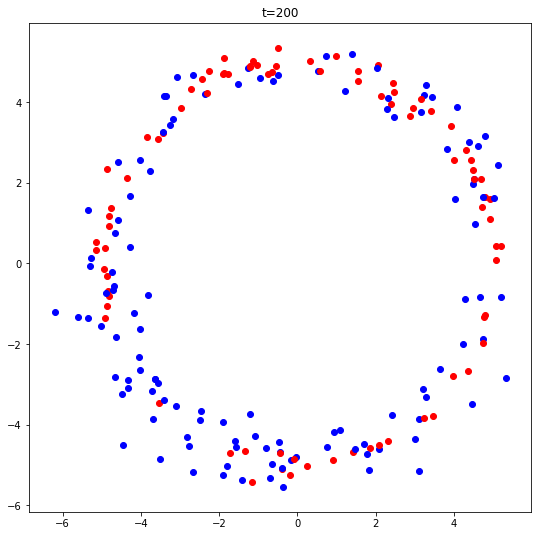

In [12]:
for t, x in enumerate(roving_balls(steps=200, period=150, var1=0.2, var2=0.5)):
    plt.scatter(*x[:2], color=['r','b'][int(x[-1])])
    plt.title(f't={t}')
    display.clear_output(wait=True)
    display.display(plt.gcf())

display.clear_output()

It's also easy to generate a dataframe of the balls for batch testing:

In [13]:
df = pd.DataFrame(roving_balls(10000, 15000), columns=['x1','x2','y'])
df.index.name = 't'

In [14]:
df.head()

,x1,x2,y
t,,,
0,5.154064,0.209197,0.0
1,-6.415783,0.516011,1.0
2,-6.033410,1.492866,1.0
3,-4.894135,-0.118316,1.0
4,-2.752337,-0.268330,1.0


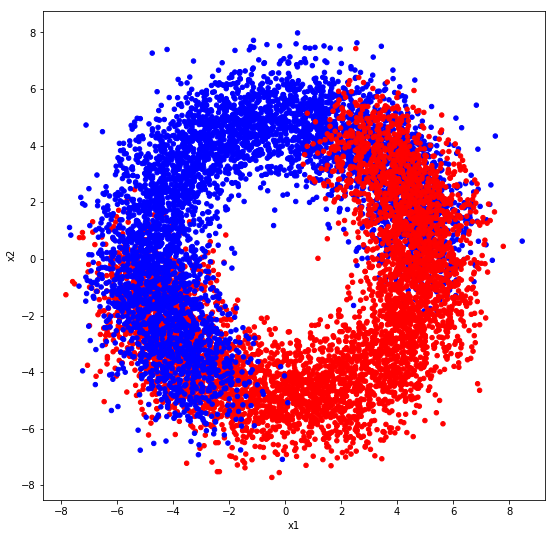

In [19]:
df.plot.scatter('x1', 'x2', c=df['y'].apply(lambda x: 'r' if x else 'b'));